## Análisis Exploratorio de Datos (EDA) - Películas

1. Importación de librerías y carga de datos


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np

# Cargar el dataset
df = pd.read_csv('../Datasets/movies_top_10_percent.csv')

2. Visión general de los datos

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4538 entries, 0 to 4537
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4538 non-null   int64  
 1   title                  4538 non-null   object 
 2   tagline                4538 non-null   object 
 3   overview               4538 non-null   object 
 4   runtime                4538 non-null   float64
 5   original_language      4538 non-null   object 
 6   genres                 4538 non-null   object 
 7   belongs_to_collection  4538 non-null   int64  
 8   status                 4538 non-null   object 
 9   release_date           4538 non-null   object 
 10  release_year           4538 non-null   int64  
 11  popularity             4538 non-null   float64
 12  vote_count             4538 non-null   float64
 13  vote_average           4538 non-null   float64
 14  production_companies   4462 non-null   object 
 15  prod

In [4]:
df.describe()

,id,runtime,belongs_to_collection,release_year,popularity,vote_count,vote_average,revenue,budget,return
count,4538.000000,4538.000000,4538.000000,4538.000000,4538.000000,4538.000000,4538.000000,4.538000e+03,4.538000e+03,4.538000e+03
mean,73010.983914,107.883208,0.249008,2000.169017,13.243859,805.047598,6.368532,8.968172e+07,2.812194e+07,2.377827e+02
std,111192.723513,25.317364,0.432486,16.258623,14.308158,1323.633283,0.887432,1.773789e+08,4.314828e+07,1.512738e+04
min,5.000000,0.000000,0.000000,1925.000000,8.337560,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,8390.500000,94.000000,0.000000,1994.000000,9.520921,102.000000,5.800000,0.000000e+00,0.000000e+00,0.000000e+00
50%,14159.000000,104.000000,0.000000,2005.000000,11.065399,305.000000,6.400000,1.925592e+07,1.000000e+07,8.448576e-01
75%,81851.500000,118.750000,0.000000,2012.000000,13.378439,900.750000,7.000000,9.939739e+07,3.700000e+07,3.194480e+00
max,463906.000000,877.000000,1.000000,2017.000000,547.488298,14075.000000,10.000000,2.787965e+09,3.800000e+08,1.018619e+06


In [5]:
df['runtime'].describe()

count    4538.000000
mean      107.883208
std        25.317364
min         0.000000
25%        94.000000
50%       104.000000
75%       118.750000
max       877.000000
Name: runtime, dtype: float64

Se observa películas con 0 minutos de duración y algunas con más de 5 horas por lo que merece un análisis en detalle de posibles Outliers.

In [3]:
# Filtrar las películas con duración 0 y obtener sus títulos
peliculas_duracion_cero = df[df['runtime'] == 0]['title']

# Imprimir los títulos
print("Películas con duración 0 minutos:")
for titulo in peliculas_duracion_cero:
    print(titulo)

# Imprimir el total de películas encontradas
print(f"\nTotal de películas con duración 0: {len(peliculas_duracion_cero)}")

Películas con duración 0 minutos:
Thor: Ragnarok
Justice League
The Bar
No manches Frida
Night Guards
The Marine 5: Battleground
LEGO DC Super Hero Girls: Brain Drain

Total de películas con duración 0: 7


In [4]:
# Filtrar las películas con duración 0 y obtener sus títulos
peliculas_duracion_cero = df[df['runtime'] > 300]['title']

# Imprimir los títulos
print("Películas con duración mayor a 300 minutos:")
for titulo in peliculas_duracion_cero:
    print(titulo)

# Imprimir el total de películas encontradas
print(f"\nTotal de películas con duración mayor a 300 minutos: {len(peliculas_duracion_cero)}")

Películas con duración mayor a 300 minutos:
Taken
The Stand
Gangs of Wasseypur

Total de películas con duración mayor a 300 minutos: 3


In [5]:
# Reemplazar 0 con la mediana
median_runtime = df['runtime'].median()
df['runtime'] = df['runtime'].replace(0, median_runtime)

Reemplacé las películas de 0 duracíón por la mediana, ya que se puede deber a la falta de carga. Y las de una duración de más de 5 horas las dejé tal como estaban ya que pueden ser casos particulares de películas en formato de miniserie, y por la cantidad de 3 en un conjunto 4500 películas se tratan de casos aislados de Outliers.

#### Visualizaciones

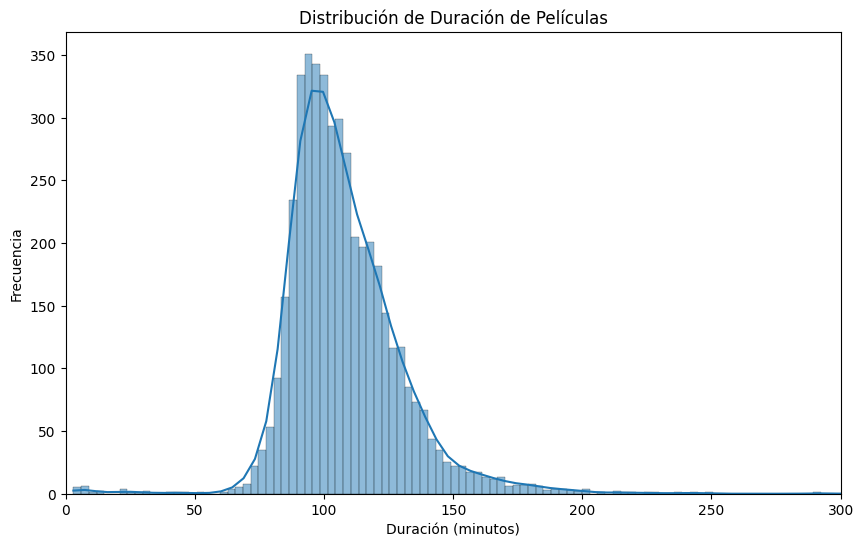

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['runtime'], kde=True)
plt.title('Distribución de Duración de Películas')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.xlim(0, 300)  # Agregar el límite en el eje X
plt.show()

#### 3. Análisis de variables numéricas
##### 3.1 Distribución de presupuestos

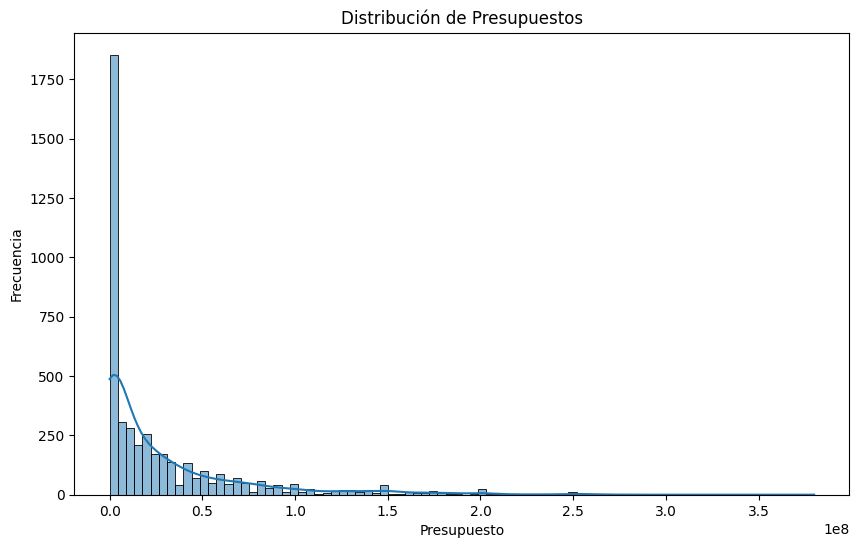

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['budget'], kde=True)
plt.title('Distribución de Presupuestos')
plt.xlabel('Presupuesto')
plt.ylabel('Frecuencia')
plt.show()

In [8]:
# Contar películas con presupuesto cero
peliculas_presupuesto_cero = df[df['budget'] == 0]
cantidad_presupuesto_cero = len(peliculas_presupuesto_cero)

print(f"Número de películas con presupuesto cero: {cantidad_presupuesto_cero}")
print(f"Porcentaje de películas con presupuesto cero: {(cantidad_presupuesto_cero / len(df)) * 100:.2f}%")

# Estadísticas adicionales
presupuestos_no_cero = df[df['budget'] > 0]['budget']
print(f"\nEstadísticas de presupuestos (excluyendo cero):")
print(presupuestos_no_cero.describe())

Número de películas con presupuesto cero: 1395
Porcentaje de películas con presupuesto cero: 30.74%

Estadísticas de presupuestos (excluyendo cero):
count    3.143000e+03
mean     4.060368e+07
std      4.670554e+07
min      1.000000e+00
25%      9.000000e+06
50%      2.500000e+07
75%      5.500000e+07
max      3.800000e+08
Name: budget, dtype: float64


La observación de que un 30.74% de las películas mejor valoradas tienen un presupuesto registrado de cero es interesante y puede deberse a varios factores. A continuación, se analizan posibles causas y se elabora una conclusión:

**Posibles Causas**
* **Políticas Públicas de Subsidios no Registrados Debidamente:**

Es posible que algunas películas reciban subsidios o incentivos fiscales de gobiernos que no se reflejan en el presupuesto oficial de la película. Esto puede ocurrir debido a la falta de transparencia o a procedimientos administrativos que no requieren la declaración del subsidio en el presupuesto final.
* **Becas y Financiamiento Privado no Contabilizado:**

Algunas películas pueden estar financiadas parcialmente o en su totalidad por becas, premios o financiamiento privado que no se incluye en el presupuesto oficial. Esto es común en el cine independiente y en proyectos artísticos que reciben apoyo de fundaciones o instituciones privadas.
* **Cine Amateur:**

El cine amateur o de bajo presupuesto a menudo no registra un presupuesto formal. Estas producciones pueden depender de recursos propios, voluntariado y donaciones en especie, lo que hace que su presupuesto oficial sea cero o muy bajo.
* **Errores de Registro:**

También es posible que existan errores o inconsistencias en la base de datos utilizada, donde el presupuesto no se haya registrado adecuadamente.
  


##### 3.2 Relación entre presupuesto y recaudación

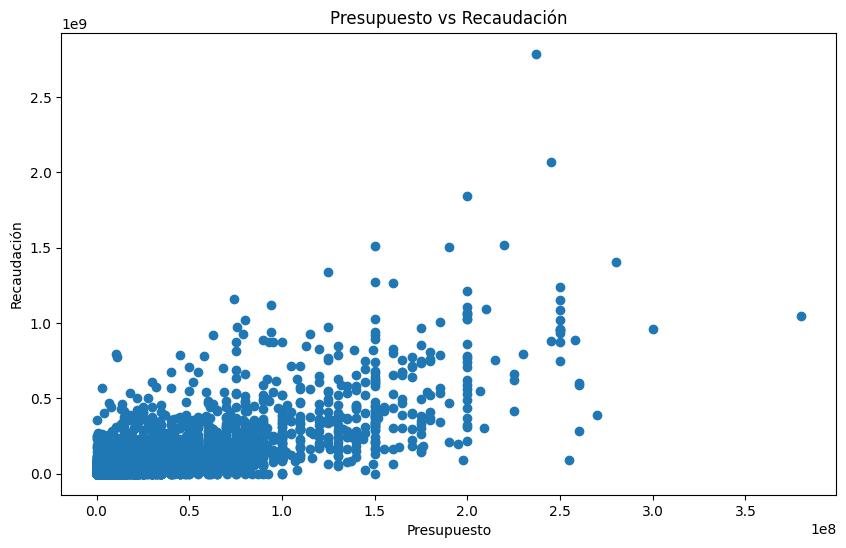

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(df['budget'], df['revenue'])
plt.title('Presupuesto vs Recaudación')
plt.xlabel('Presupuesto')
plt.ylabel('Recaudación')
plt.show()

#### 4. Análisis de variables categóricas
##### 4.1 Géneros más comunes

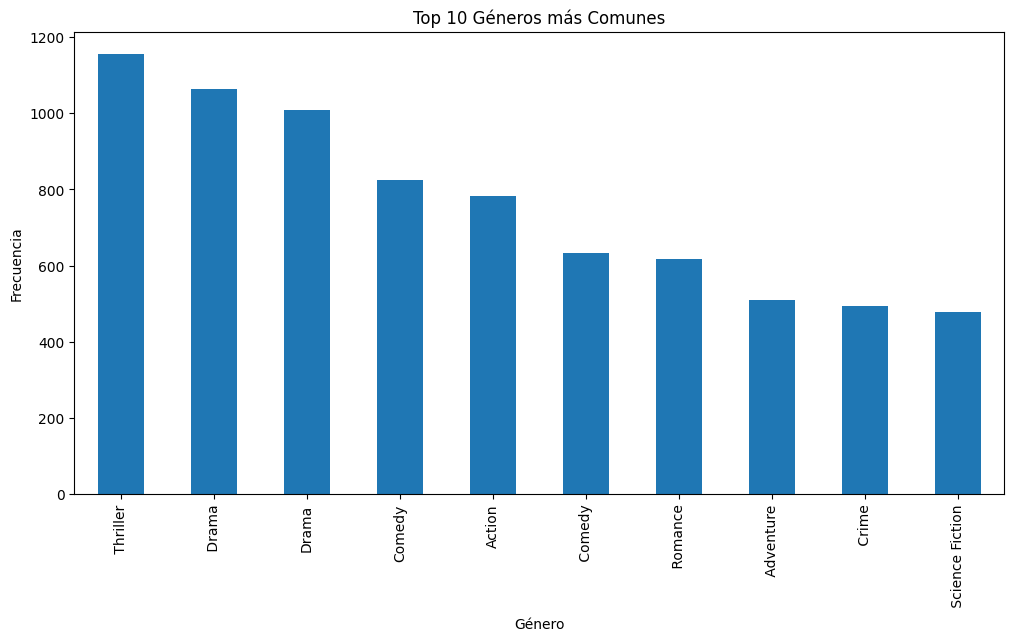

In [10]:
genres = df['genres'].str.split(',', expand=True).stack().value_counts()
plt.figure(figsize=(12, 6))
genres[:10].plot(kind='bar')
plt.title('Top 10 Géneros más Comunes')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

#### 5. Análisis temporal
##### 5.1 Tendencia de películas por año

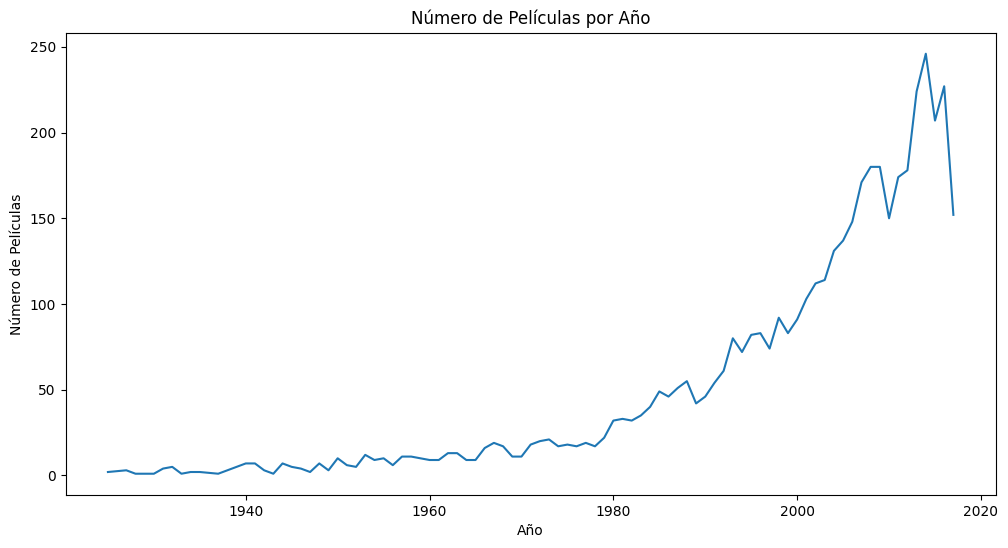

In [11]:
df['release_year'] = pd.to_datetime(df['release_date']).dt.year
plt.figure(figsize=(12, 6))
df['release_year'].value_counts().sort_index().plot()
plt.title('Número de Películas por Año')
plt.xlabel('Año')
plt.ylabel('Número de Películas')
plt.show()

**Conclusión**  
  
El gráfico temporal del número de películas por año revela dos períodos clave de crecimiento en la industria cinematográfica:

**Crecimiento en los años 1980:**

Este aumento puede estar relacionado con varios factores, incluyendo avances tecnológicos (como la introducción del video doméstico), cambios en las políticas de producción y distribución, y un aumento en la demanda de contenido cinematográfico.  
  
**Crecimiento exponencial a partir de los años 2000:**

Este período de crecimiento exponencial puede atribuirse a la revolución digital, que ha facilitado la producción y distribución de películas. La aparición de nuevas plataformas de distribución (como el streaming) y la globalización del mercado cinematográfico también han contribuido a este incremento.  
  
**Retrocesos en Años Particulares**  
Los retrocesos observados en años particulares pueden ser resultado de diversos factores, incluyendo crisis económicas, cambios en la política de la industria, o eventos globales que afectaron la producción cinematográfica.

##### 6. Nube de palabras de títulos

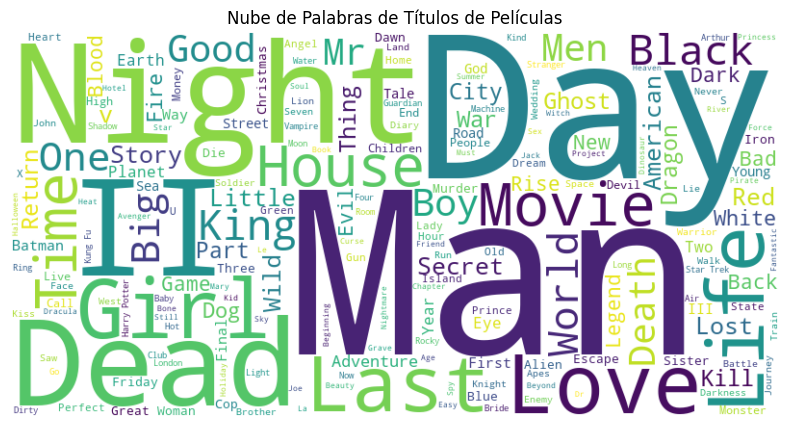

In [12]:
text = ' '.join(df['title'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Títulos de Películas')
plt.show()

#### 7. Análisis de outliers
##### 7.1 Boxplot de presupuestos

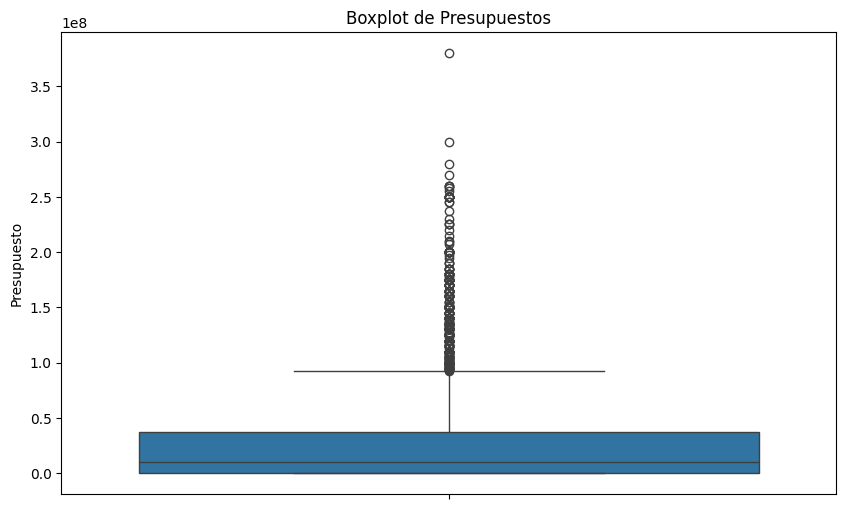

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['budget'])
plt.title('Boxplot de Presupuestos')
plt.ylabel('Presupuesto')
plt.show()

#### Outliers:

Los círculos fuera de los bigotes representan outliers, que son valores atípicos significativamente mayores que el resto de los datos. En este caso, hay una gran cantidad de outliers en la parte superior, indicando que hay muchas películas con presupuestos excepcionalmente altos en comparación con la mayoría de las películas. 
   
**Conclusión**  
El boxplot revela que la mayoría de las películas tienen presupuestos relativamente bajos a moderados, mientras que un número considerable de películas tienen presupuestos excepcionalmente altos. Estos outliers de alto presupuesto son los que impulsan el valor máximo en el gráfico, lo que sugiere que aunque la mayoría de las películas operan con presupuestos limitados, hay una minoría significativa que dispone de grandes cantidades de dinero para su producción.

La presencia de muchos outliers de alto presupuesto puede tener varias implicaciones:

**Industria Bifurcada:** La industria cinematográfica puede estar bifurcada, con muchas películas de bajo presupuesto y unas pocas de muy alto presupuesto. Esto puede reflejar una tendencia en la que grandes estudios invierten fuertemente en producciones que esperan que sean éxitos de taquilla.

**Riesgo y Recompensa:** Las películas de alto presupuesto podrían ser intentos de producir grandes éxitos comerciales, con una estrategia de alto riesgo y alta recompensa.

**Desigualdad en Financiación:** Puede haber una desigualdad significativa en la financiación disponible para diferentes proyectos, con algunos proyectos recibiendo una proporción desmesurada de recursos.

En resumen, mientras la mayoría de las películas tienen presupuestos moderados, la existencia de numerosas producciones con presupuestos muy altos destaca una polarización en la financiación dentro de la industria cinematográfica. Esta distribución puede reflejar diferentes estrategias y niveles de acceso a recursos dentro del sector.

#### 8. Correlaciones

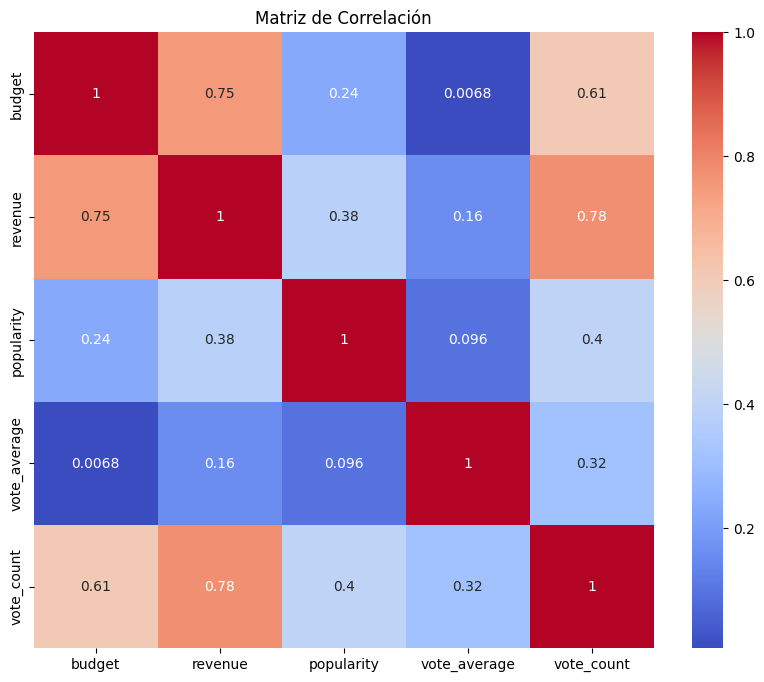

In [14]:
correlation_matrix = df[['budget', 'revenue', 'popularity', 'vote_average', 'vote_count']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

#### Intepretación de matriz de correlación:

- Fuerte correlación positiva entre **budget** y **revenue** (0.75), indicando que las películas con mayores presupuestos tienden a generar más ingresos.
- Correlación moderada entre **budget** y **vote_count** (0.61), sugiriendo que las películas con mayores presupuestos tienden a recibir más votos.
- Correlación fuerte entre **revenue** y **vote_count** (0.78), indicando que las películas que generan más ingresos tienden a recibir más votos.
- Baja correlación entre **budget** y **vote_average** (0.0068), sugiriendo que un mayor presupuesto no garantiza mejores calificaciones.
- Correlación moderada entre **popularity** y **revenue** (0.38), indicando que las películas más populares tienden a generar más ingresos, aunque la relación no es muy fuerte.

Estas correlaciones sugieren que mientras el presupuesto y los ingresos están fuertemente relacionados, la calidad percibida (medida por el promedio de votos) no está necesariamente vinculada a estos factores financieros.

En general, las relaciones más fuertes en la matriz de correlación son entre **budget** y **revenue**, **budget** y **vote_count**, así como **revenue** y **vote_count**. Esto sugiere que películas con mayores presupuestos tienden a generar más ingresos y atraer más votos. Sin embargo, el presupuesto no tiene una correlación significativa con el promedio de votos, lo que indica que gastar más en una película no garantiza una mejor calificación por parte del público.

Además, la popularidad está moderadamente relacionada con los ingresos y la cantidad de votos, pero no tanto con el promedio de votos. Esto puede indicar que mientras una película puede ser popular y rentable, esto no siempre se traduce en una alta valoración crítica.

Finalmente, aunque existe una correlación moderada entre el promedio de votos y la cantidad de votos, esta no es muy alta, lo que sugiere que una buena calificación no necesariamente implica una gran cantidad de votos y viceversa.